## 07 - Image descriptors

Moacir A. Ponti - ICMC/USP

### Part 2 - Texture features

Consider not only the absolute value (color/intensity) of pixels, but relationships between pixel values within a image region
* a given color found in a flat region differs from the same color found in a region with high variance
* texture descriptors allow to differentiate between patterns of pixel variances 

Althouth there are various texture descriptors in the literature, here we focus on LBP (Local Binary Patterns) as implemented in `scikit-image` package.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

from skimage import feature

Texture has semantic that explain the way elements relate to each other visually

---
### Texture features

| Texture | Example | Texture | Example
|:---:|:---:|:---:|:---:|
| Interlaced | ![Interlaced](images/texture/texture_interlaced.jpg)|  Bubbly | ![Bubbly](images/texture/texture_bubbly.jpg)|
| Sprinkled | ![Sprinkled](images/texture/texture_sprinkled.jpg)| Dotted | ![Dotted](images/texture/texture_dotted2.jpg)|
| Braided | ![Braided](images/texture/texture_braided.jpg)| Chequered | ![Chequered](images/texture/texture_chequered.jpg)|
    

**Local Binary Patterns (LBP)** and variants is an efficient descriptor for analysis of texture

It codifies local patterns in which each pixel is compared with neighbours using the value of the central pixel as threshold:
* values greater or equal to the central pixels outputs 1
* values lower than the central pixel outputs 0

<img src="images/texture/LBP.png" width=380></img>

OBS: the code depends on where you begin in the sampled points.

Considering 8 sampled pixels in the neighborhood, there are $2^8 = 256$ unique codes, which are associated with local shape patterns:

<img src="images/texture/LBP2.png" width=600></img>

58 are called uniform, and the remaining non-uniform (with more than two transitions between 1s and 0s).

However in `skimage`, uniform are also rotation invariant codes: an edge represented as 00001111 is considered to be in the same bin as 00111100. Therefore with 8 points we have 10 bins representing:
* 9 bins for rotation-invariant uniform codes
* 1 bin all other non-uniform codes.

In [3]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

In [4]:
img1 = imageio.imread("images/texture/texture_dotted.jpg")
img2 = imageio.imread("images/texture/texture_dotted3.jpg")
img3 = imageio.imread("images/texture/texture_dotted2.jpg")
img4 = imageio.imread("images/texture/texture_interlaced.jpg")
img5 = imageio.imread("images/texture/texture_chequered.jpg")
img6 = imageio.imread("images/texture/texture_sprinkled.jpg")

lbp1 = lbp_features(img1,2,8)
lbp2 = lbp_features(img2,2,8)
lbp3 = lbp_features(img3,2,8)
lbp4 = lbp_features(img4,2,8)
lbp5 = lbp_features(img5,2,8)
lbp6 = lbp_features(img6,2,8)

dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

Text(0.5, 1.0, 'Rank 5 : 0.3151')

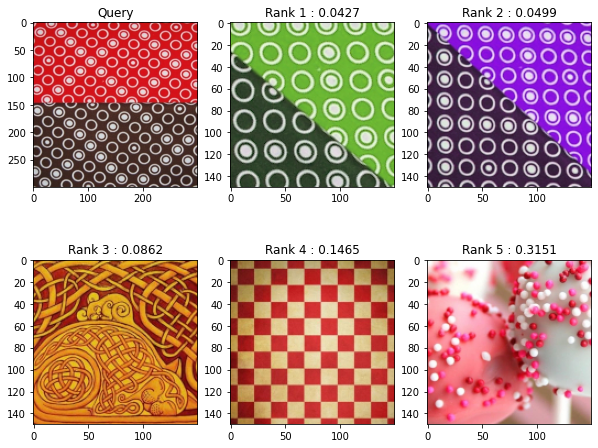

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Query')
plt.subplot(232); plt.imshow(img3); plt.title('Rank 1 : %.4f' % dQ3_H)
plt.subplot(233); plt.imshow(img2); plt.title('Rank 2 : %.4f' % dQ2_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)

(-0.8900000000000001, 9.89, 0.0, 0.2962866666534984)

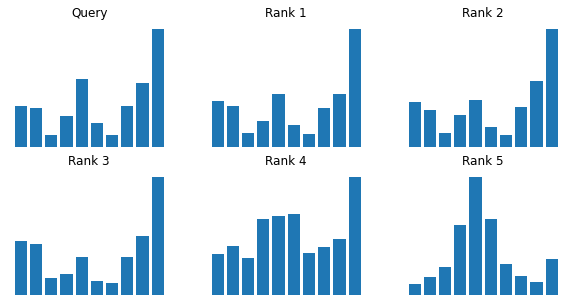

In [6]:
vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 
plt.title('Query'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp3); 
plt.title('Rank 1'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp2); 
plt.title('Rank 2'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp4); 
plt.title('Rank 3'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp5); 
plt.title('Rank 4'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp6); 
plt.title('Rank 5'); plt.axis('off')